<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Poisson-Processes" data-toc-modified-id="Poisson-Processes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Poisson Processes</a></span></li><li><span><a href="#Random-Walk-and-Brownian-motion-processes" data-toc-modified-id="Random-Walk-and-Brownian-motion-processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Walk and Brownian motion processes</a></span></li><li><span><a href="#Markov-Models" data-toc-modified-id="Markov-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Markov Models</a></span></li><li><span><a href="#Hidden-Markov-Models" data-toc-modified-id="Hidden-Markov-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hidden Markov Models</a></span></li><li><span><a href="#Gaussian-Processes" data-toc-modified-id="Gaussian-Processes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gaussian Processes</a></span></li><li><span><a href="#Auto-Regressive-Moving-average-processes" data-toc-modified-id="Auto-Regressive-Moving-average-processes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Auto-Regressive Moving average processes</a></span></li></ul></div>

# Stochastic Processes Analysis

This notebook provides a collection of Stochastic Processes Analysis in Python. In order to realize this project, the following references have been taken into account: <br>
- https://fromosia.wordpress.com/2017/03/19/stochastic-poisson-process/#figure2
- http://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017
- http://people.bu.edu/andasari/courses/stochasticmodeling/stochastics.html
- https://medium.com/@ensembledme/random-walks-with-python-8420981bc4bc
- http://krasserm.github.io/2018/03/19/gaussian-processes/

In [1]:
!pip install pydot
!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from numpy.linalg import inv
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from statsmodels.tsa.arima_model import ARMA
from random import random
from sklearn.metrics import mean_squared_error
from pprint import pprint 
import pydot
import os
#%matplotlib notebook

## Poisson Processes

Poisson Processes are used to model a series of discrete events in which we know the average time between the occurrence of different events but we don’t know exactly when each of these events might take place. <br> <br>
A process can be considered to belong to the class of Poisson Processes if it can meet the following criteria’s:
- The events are independent of each other (if an event happens, this does not alter the probability that another event can take place).
- Two events can’t take place simultaneously.
- The average rate between events occurrence is constant.

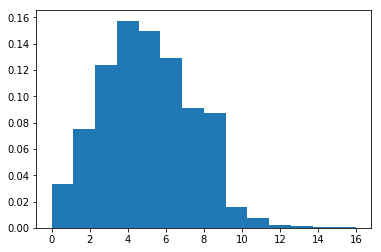

In [3]:
s = np.random.poisson(5, 10000)
plt.hist(s, 14, density=True)
plt.show()

In [4]:
np.random.poisson(lam=(100., 500.), size=(5, 2))

array([[ 92, 512],
       [100, 500],
       [ 99, 522],
       [ 86, 499],
       [ 80, 495]])

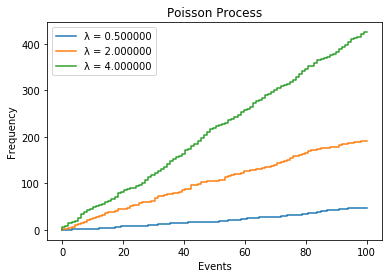

In [5]:
N = 100 # Events
lambdas = [0.5, 2, 4]
X_T = [np.random.poisson(lam, size=N) for lam in lambdas]
S = [[np.sum(X[0:i]) for i in range(N)] for X in X_T]
X = np.linspace(0, N, N)
 
# Plot the graph
graphs = [plt.step(X, S[i], label="λ = %f"%lambdas[i])[0] 
          for i in range(len(lambdas))]
plt.legend(handles=graphs)
plt.title("Poisson Process")
plt.xlabel("Events")
plt.ylabel("Frequency")
plt.show()

## Random Walk and Brownian motion processes

A Random Walk can be any sequence of discrete steps (of always the same length) moving in random directions. Random Walks can take place in any type of dimensional space (eg. 1D, 2D, nD). <br> <br>
As mentioned before, Random Walk is used to describe a discrete-time process. Instead, Brownian Motion can be used to describe a continuous-time random walk.
Some examples of random walks applications are: tracing the path taken by molecules when moving through a gas during the diffusion process, sports events predictions etc…

Text(0.5, 1.0, 'Random Walk in 1D')

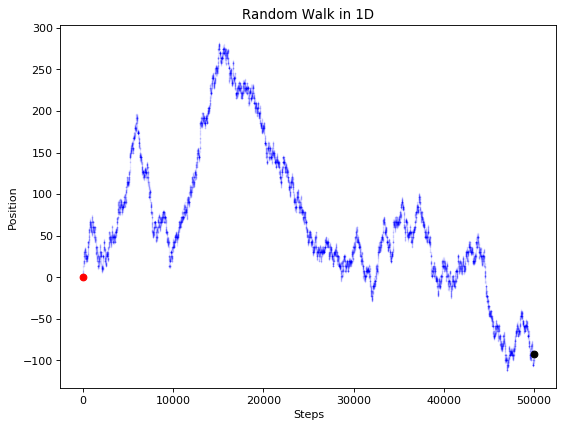

In [6]:
# Defining parameters for the walk
dims = 1
step_n = 50000
step_set = [-1, 1]
origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1] # first element 
stop = path[-1:] # last element
# Plot the path
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(np.arange(step_n+1), path, c='blue',alpha=0.35, s=0.005);
plt.plot(0, start, c='red', marker='o')
plt.plot(step_n, stop, c='black', marker='o')
plt.xlabel("Steps")
plt.ylabel("Position")
plt.title('Random Walk in 1D')

Text(0.5, 1.0, 'Random Walk in 2D')

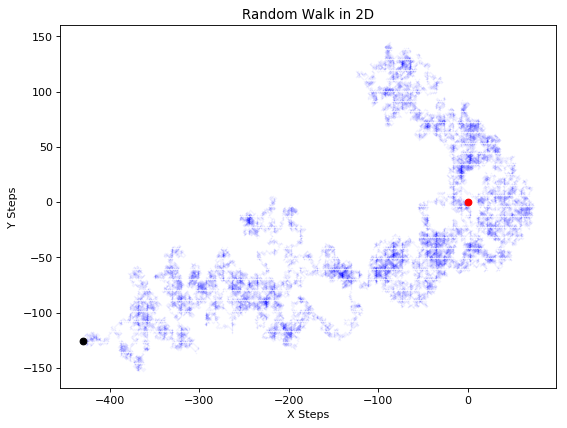

In [7]:
# Defining parameters for the walk
dims = 2
step_n = 50000
step_set = [-1, 1]
origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1] # first element 
stop = path[-1:] # last element 
# Plot the path
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(path[:,0], path[:,1],c='blue', alpha=0.35, s=0.005);
plt.plot(start[:,0], start[:,1],c='red', marker='o')
plt.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.xlabel("X Steps")
plt.ylabel("Y Steps")
plt.title('Random Walk in 2D')

Text(0.5, 0.92, 'Random Walk in 3D')

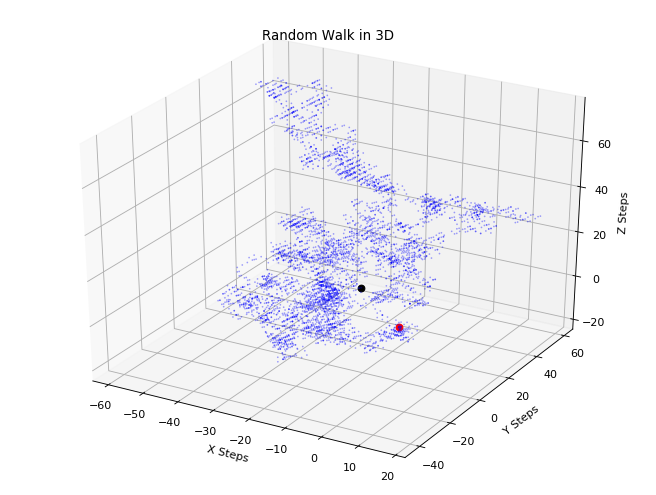

In [8]:
# Defining parameters for the walk
dims = 3
step_n = 5000
step_set = [-1, 1]
origin = np.zeros((1,dims))
# Simulate steps in 3D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1] # first element 
stop = path[-1:] # last element
# Plot the path
fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.set_xlabel('X Steps')
ax.set_ylabel('Y Steps')
ax.set_zlabel('Z Steps')
ax.scatter3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.35, s=0.3)
ax.plot3D(start[:,0], start[:,1], start[:,2], c='red', marker='o')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], c='black', marker='o')
plt.title('Random Walk in 3D')

## Markov Models

A Markov chain (model) describes a stochastic process where the assumed probability of future state(s) depends only on the current process state and not on any the states that preceded it. In this example, will be created a probability diagram (given of state space composed by 4 elements) of how a child might decide to spend a day.

In [9]:
# creating a state space and initial state probabilities
states = ['sleeping', 'eating', 'walking', 'playing']
pi = [0.25, 0.25, 0.3, 0.2]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

sleeping    0.25
eating      0.25
walking     0.30
playing     0.20
Name: states, dtype: float64
1.0


In [10]:
# creating a transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.2, 0.2]
q_df.loc[states[1]] = [0.35, 0.45, 0.1, 0.1]
q_df.loc[states[2]] = [0.25, 0.25, 0.3, 0.2]
q_df.loc[states[3]] = [0.25, 0.25, 0.1, 0.4]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

         sleeping eating walking playing
sleeping      0.4    0.2     0.2     0.2
eating       0.35   0.45     0.1     0.1
walking      0.25   0.25     0.3     0.2
playing      0.25   0.25     0.1     0.4

 [[0.4 0.2 0.2 0.2]
 [0.35 0.45 0.1 0.1]
 [0.25 0.25 0.3 0.2]
 [0.25 0.25 0.1 0.4]] (4, 4) 

sleeping    1.0
eating      1.0
walking     1.0
playing     1.0
dtype: float64


In [11]:
# creating a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('eating', 'eating'): 0.45,
 ('eating', 'playing'): 0.1,
 ('eating', 'sleeping'): 0.35,
 ('eating', 'walking'): 0.1,
 ('playing', 'eating'): 0.25,
 ('playing', 'playing'): 0.4,
 ('playing', 'sleeping'): 0.25,
 ('playing', 'walking'): 0.1,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'playing'): 0.2,
 ('sleeping', 'sleeping'): 0.4,
 ('sleeping', 'walking'): 0.2,
 ('walking', 'eating'): 0.25,
 ('walking', 'playing'): 0.2,
 ('walking', 'sleeping'): 0.25,
 ('walking', 'walking'): 0.3}


"Nodes:\n['sleeping', 'eating', 'walking', 'playing']\n"
Edges:
[('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'walking', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'playing', {'weight': 0.2, 'label': 0.2}), ('eating', 'sleeping', {'weight': 0.35, 'label': 0.35}), ('eating', 'eating', {'weight': 0.45, 'label': 0.45}), ('eating', 'walking', {'weight': 0.1, 'label': 0.1}), ('eating', 'playing', {'weight': 0.1, 'label': 0.1}), ('walking', 'sleeping', {'weight': 0.25, 'label': 0.25}), ('walking', 'eating', {'weight': 0.25, 'label': 0.25}), ('walking', 'walking', {'weight': 0.3, 'label': 0.3}), ('walking', 'playing', {'weight': 0.2, 'label': 0.2}), ('playing', 'sleeping', {'weight': 0.25, 'label': 0.25}), ('playing', 'eating', {'weight': 0.25, 'label': 0.25}), ('playing', 'walking', {'weight': 0.1, 'label': 0.1}), ('playing', 'playing', {'weight': 0.4, 'label': 0.4})]


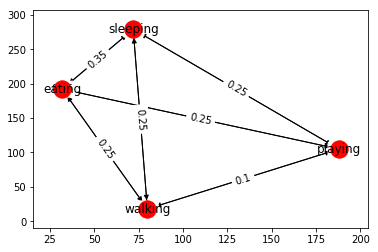

In [12]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
pprint(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
print(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'markov_diagram.dot')
(graph,) = pydot.graph_from_dot_file('markov_diagram.dot')
graph.write_png('markov_diagram.png')

![](markov_diagram.png)

## Hidden Markov Models

HMMs are probabilistic graphical models used to predict a sequence of hidden (unknown) states from a set of observable states. <br> <br>
Therefore, when working with Hidden Markov Models, we just need to know our present state in order to make a prediction about the next one (we don’t need any information about the previous states).
To make our predictions using HMMs we just need to calculate the joint probability of our hidden states and then select the sequence which yields the highest probability (the most likely to happen).
In order to calculate the joint probability we need three main types of information:
Initial condition: the initial probability we have to start our sequence in any of the hidden states.
Transition probabilities: the probabilities of moving from one hidden state to another.
Emission probabilities: the probabilities of moving from a hidden state to an observable state. <br> <br>
One main problem when using Hidden Markov Models is that as the number of states increases, the number of probabilities and possible scenarios increases exponentially. In order to solve that, is possible to use another algorithm called the Viterbi Algorithm.

In [13]:
# create state space and initial state probabilities

hidden_states = ['healthy', 'sick']
pi = [0.5, 0.5]
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n', state_space.sum())

healthy    0.5
sick       0.5
Name: states, dtype: float64

 1.0


In [14]:
# create hidden transition matrix
# a or alpha = transition probability matrix of changing states given 
# a state. Matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.7, 0.3]
a_df.loc[hidden_states[1]] = [0.4, 0.6]

print(a_df)

a = a_df.values
print('\n', a, a.shape, '\n')
print(a_df.sum(axis=1))

        healthy sick
healthy     0.7  0.3
sick        0.4  0.6

 [[0.7 0.3]
 [0.4 0.6]] (2, 2) 

healthy    1.0
sick       1.0
dtype: float64


In [15]:
# create matrix of observation (emission) probabilities
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is number of states 
# and O is number of different possible observations

observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.5, 0.1, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.3, 0.2]

print(b_df)

b = b_df.values
print('\n', b, b.shape, '\n')
print(b_df.sum(axis=1))

        sleeping eating walking playing
healthy      0.2    0.5     0.1     0.2
sick         0.4    0.1     0.3     0.2

 [[0.2 0.5 0.1 0.2]
 [0.4 0.1 0.3 0.2]] (2, 4) 

healthy    1.0
sick       1.0
dtype: float64


In [16]:
# create graph edges and weights

hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

{('healthy', 'healthy'): 0.7,
 ('healthy', 'sick'): 0.3,
 ('sick', 'healthy'): 0.4,
 ('sick', 'sick'): 0.6}
{('healthy', 'eating'): 0.5,
 ('healthy', 'playing'): 0.2,
 ('healthy', 'sleeping'): 0.2,
 ('healthy', 'walking'): 0.1,
 ('sick', 'eating'): 0.1,
 ('sick', 'playing'): 0.2,
 ('sick', 'sleeping'): 0.4,
 ('sick', 'walking'): 0.3}


Nodes:
['healthy', 'sick']

Edges:
OutMultiEdgeDataView([('healthy', 'healthy', {'weight': 0.7, 'label': 0.7}), ('healthy', 'sick', {'weight': 0.3, 'label': 0.3}), ('healthy', 'sleeping', {'weight': 0.2, 'label': 0.2}), ('healthy', 'eating', {'weight': 0.5, 'label': 0.5}), ('healthy', 'walking', {'weight': 0.1, 'label': 0.1}), ('healthy', 'playing', {'weight': 0.2, 'label': 0.2}), ('sick', 'healthy', {'weight': 0.4, 'label': 0.4}), ('sick', 'sick', {'weight': 0.6, 'label': 0.6}), ('sick', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sick', 'eating', {'weight': 0.1, 'label': 0.1}), ('sick', 'walking', {'weight': 0.3, 'label': 0.3}), ('sick', 'playing', {'weight': 0.2, 'label': 0.2})])


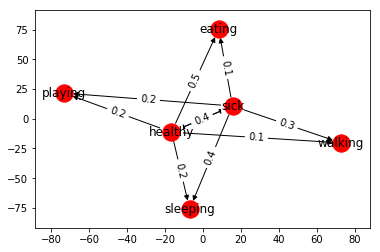

In [17]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'hidden_markov.dot')
(graph,) = pydot.graph_from_dot_file('hidden_markov.dot')
graph.write_png('hidden_markov.png')

![](hidden_markov.png)

In [18]:
# observation sequence of dog's behaviors
# observations are encoded numerically

obs_map = {'sleeping':0, 'eating':1, 'walking':2, 'playing':3}
obs = np.array([1,3,2,1,0,1,2,1,0,3,2,0,1,2,3,1,0,2,2,3])
inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print( pd.DataFrame(np.column_stack([obs, obs_seq]), 
                columns=['Obs_code', 'Obs_seq']) )

   Obs_code   Obs_seq
0         1    eating
1         3   playing
2         2   walking
3         1    eating
4         0  sleeping
5         1    eating
6         2   walking
7         1    eating
8         0  sleeping
9         3   playing
10        2   walking
11        0  sleeping
12        1    eating
13        2   walking
14        3   playing
15        1    eating
16        0  sleeping
17        2   walking
18        2   walking
19        3   playing


In [19]:
# define Viterbi algorithm for shortest path
# code adapted from Stephen Marsland's, Machine Learning An Algorthmic Perspective, Vol. 2
# https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py

def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        path[t] = phi[int(path[t+1]), [t+1]]
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 0.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 1.0
s=0 and t=6: phi[0, 6] = 0.0
s=1 and t=6: phi[1, 6] = 0.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 1.0
s=0 and t=8: phi[0, 8] = 0.0
s=1 and t=8: phi[1, 8] = 0.0
s=0 and t=9: phi[0, 9] = 0.0
s=1 and t=9: phi[1, 9] = 1.0
s=0 and t=10: phi[0, 10] = 0.0
s=1 and t=10: phi[1, 10] = 1.0
s=0 and t=11: phi[0, 11] = 1.0
s=1 and t=11: phi[1, 11] = 1.0
s=0 and t=12: phi[0, 12] = 1.0
s=1 and t=12: phi[1, 12] = 1.0
s=0 and t=13: phi[0, 13] = 0.0
s=1 and t=13: phi[1, 13] = 0.0
s=0 and t=14: phi[0, 14] = 0.0
s=1 and t=14: phi[1, 14] = 1.0
s=0 and t=15: phi[0, 15] = 0.0
s=1 and t=15: phi[1, 15] = 1.0
s=0 and t=16: phi[0, 16] = 0.0
s=1 and t=16: phi[1, 16] = 0.0
s=0 and t=17: phi[0, 17

In [20]:
state_map = {0:'healthy', 1:'sick'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,eating,healthy
1,playing,healthy
2,walking,healthy
3,eating,healthy
4,sleeping,healthy
5,eating,healthy
6,walking,healthy
7,eating,healthy
8,sleeping,sick
9,playing,sick


## Gaussian Processes

Gaussian Processes are a class of stationary, zero-mean stochastic processes which are completely dependent on their autocovariance functions. This class of models can be used for both regression and classification tasks.
One of the greatest advantages of Gaussian Processes is that they can provide estimates about uncertainty, for example giving us an estimate of how sure an algorithm is that an item belongs to a class or not.
In order to deal with situations which embed a certain degree of uncertainty is typically made use of probability distributions. <br> <br>

We start with a prior belief and once we update it with brand new information we construct a posterior belief. This same reasoning is valid for discrete distributions as well as continuous distributions.

In [21]:
# From:
# https://github.com/krasserm/bayesian-machine-learning/blob/master/gaussian_processes_util.py
def plot_gp(mu, cov, X, X_train, Y_train, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.6 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    if X_train is not None:
        plt.plot(X_train, Y_train, '+', label='Inference')
    plt.legend()

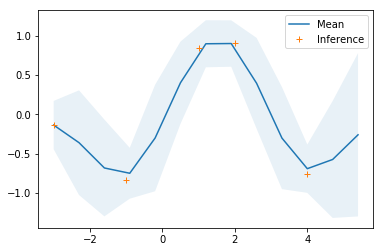

In [22]:
noise = 0.2

# Finite number of points
X = np.arange(-3, 6, 0.7).reshape(-1, 1)

# Noise free training data
X_train = np.array([-3, 4, -1, 1, 2]).reshape(-1, 1)
Y_train = np.sin(X_train)

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)

# Reuse training data from previous 1D example
gpr.fit(X_train, Y_train)

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

# Obtain optimized kernel parameters
l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])

# Plot the results
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

## Auto-Regressive Moving average processes

Auto-Regressive Moving Average (ARMA) processes are a really important class of stochastic processes used to analyse time-series. What characterises ARMA models is that their autocovariance functions only depends on a limited number of unknown parameters (that’s not possible using Gaussian Processes). <br> <br>
The ARMA acronym can be broken down in two main parts:
- Auto-Regressive = the model takes advantage of the connection between a predefined number of lagged observations and the current one.
- Moving Average = the model takes advantage of the relationship between the residual error and the observations. <br> <br>


The ARMA model makes use of two main parameters (p, q). These are:
- p = number of lag observations.
- q = the size of the moving average window.
ARMA processes assume that a time series fluctuates uniformly around a time-invariant mean. If we are trying to analyse a time-series which does not follow this pattern, then this series will need to be differenced until it would be able to achieve stationarity.

Prediction = -0.005852, Ground Truth = -0.571426
Prediction = -0.223460, Ground Truth = -0.372822
Prediction = -0.511908, Ground Truth = 1.088240
Prediction = -0.123462, Ground Truth = 0.214642
Prediction = -0.034084, Ground Truth = 0.866234
Prediction = -0.118668, Ground Truth = -0.094141
Prediction = -0.058883, Ground Truth = -2.493935
Prediction = -0.725968, Ground Truth = 1.660709
Prediction = -0.137549, Ground Truth = 0.147032
Prediction = -0.027717, Ground Truth = 0.705319
Prediction = -0.160659, Ground Truth = -0.781020
Prediction = -0.187074, Ground Truth = 1.698444
Prediction = -0.341997, Ground Truth = 1.136998
Prediction = 0.291797, Ground Truth = 0.936250
Prediction = 0.017282, Ground Truth = -0.438551
Prediction = -0.083666, Ground Truth = 0.316578
Prediction = -0.329118, Ground Truth = 2.163414
Prediction = 0.127173, Ground Truth = 1.792403
Prediction = 0.513991, Ground Truth = 1.028191
Prediction = 0.274764, Ground Truth = 1.222474
Prediction = 0.148371, Ground Truth = 1

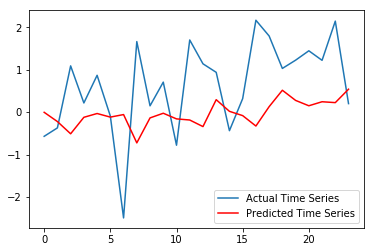

In [23]:
# ARMA example

# Creating a simple random timeseries with added noise
pure = np.linspace(-1, 1, 80)
noise = np.random.normal(0, 1, pure.shape)
X = pure + noise

# Dividing our dataset in training and test sets and preperining it to 
# be used to make predictions
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Creating and testing our model
for t in range(len(test)):
    model = ARMA(history, order=(2, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(history), len(history))
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Prediction = %f, Ground Truth = %f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Final Mean Squared Error = %.3f' % error)

plt.plot(test, label = 'Actual Time Series')
plt.plot(predictions, color='red', label = 'Predicted Time Series')
plt.legend()
plt.show()